## 총점 및 순위 계산

### 1. 읽어들일 파일명 지정 ==> 가지고 있는 파일명으로 수정필요

In [15]:
########### file_name 선언 ##################################
전처리데이터셋 = '공원반경300m_시설_개수_종합_공원점수추가_3.csv'
##########################################################

### 2. 화면에 출력되는 칼럼명을 확인한 후, 필요한 칼럼명을 복사하여 붙여넣기 (수정 불필요)

In [16]:
import pandas as pd
df = pd.read_csv(전처리데이터셋)


df.set_index('관리번호', inplace=True)
전체칼럼 = df.columns.tolist()
print (전체칼럼)

['공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적', '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)', '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명', '시설설치가능면적', '공원크기점수', '경로당 수', '노인대학 수', '버스정류장 수', '복지시설 수', '요양원 수', '지하철역 수']


### 3. 하단에 있는 "점수칼럼"에 점수로 환산할 대상인 칼럼을 수정하도록 함 ==> 수정 필요

In [17]:
점수칼럼 =  ['공원크기점수', '경로당 수', '노인대학 수', '버스정류장 수', '복지시설 수', '요양원 수','지하철역 수']
print("입력한 점수컬럼명\n", 점수칼럼)

가중치 = [1] * len(점수칼럼)

입력한 점수컬럼명
 ['공원크기점수', '경로당 수', '노인대학 수', '버스정류장 수', '복지시설 수', '요양원 수', '지하철역 수']


### 4. 건물 가중치 선언 ==> 필요시 수정
- 각 건물과 관광지에 대한 가중치를 수기로 선언함
- 필요시 가중치 조절 하십시오 
- 필요시 가중치 추가 또는 삭제 하십시오

In [18]:
#점수칼럼  순서대로 점수칼럼 갯수만큼 가중치를 입력하십시오

#공원크기점수	0.126728
#경로	0.213655
#대학	0.033771
#버스	0.184020
#복지	0.128372
#요양	0.140563
#지하철	0.172891

##### 여기만 수정하면 됩니다 ###############################
가중치 = [0.126728,0.213655,0.033771,0.184020,0.128372,0.140563,0.172891]   # 점수칼럼 갯수 만큼, 구분은 쉼표
##### 여기만 수정하면 됩니다 ###############################


# 수정 불필요
if (len(가중치) != len(점수칼럼)):
    print("입력한 가중치 갯수가 점수칼럼 갯수와 다르므로 확인후 다시 입력 바랍니다")
else:
    print("다음 줄을 실행 하세요")

다음 줄을 실행 하세요


### 5. 이하 별도 언급 시까지 수정 불필요
- 6.1에서 수정 필요

In [19]:
df = pd.read_csv(전처리데이터셋)
df.set_index('관리번호', inplace=True)

################## QGIS에서 작업한 전처리 결과 CSV 읽기 ####################################################
pre_process_set = pd.read_csv(전처리데이터셋)
pre_process_set = pre_process_set.sort_values(by='관리번호')

# Null 이 있을 수 있는 칼럼은 Null을 0로 변경
pre_process_set.fillna(0, inplace=True)
##################  QGIS에서 작업한 전처리 결과 CSV 읽기 끝###################################################

################## MinMax정규화 ##########################################################################
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# 점수칼럼 정규화
norm = pre_process_set.copy()
norm.fillna(0, inplace=True)
norm.set_index('관리번호', inplace=True)

norm[점수칼럼] = scaler.fit_transform(norm.loc[:,점수칼럼])
norm.reset_index(inplace=True)
################## 정규화 끝################################################################################


# 총점 계산
df = norm.copy()

for i in range(0, len(점수칼럼)):
    name = 점수칼럼[i]
    df[name] = df[name] * 가중치[i] 

df.set_index(['관리번호','위도','경도'], inplace=True)

df['sum'] = df.sum(1)
df.reset_index(inplace=True)

# 등수 계산 
df['순위'] = df['sum'].rank(method='dense', ascending=True).astype(int)

final = df.sort_values(by='순위')
final.reset_index(drop=True, inplace=True)

# 상위 20개만 학인
display("결과", final.head(20))

# 최종 결과 CSV 파일쓰기
final.to_csv('결과_총점_3.csv', index=False, sep=',', encoding='cp949')

'결과'

,관리번호,위도,경도,공원명,공원구분,소재지도로명주소,소재지지번주소,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,시설설치가능면적,공원크기점수,경로당 수,노인대학 수,버스정류장 수,복지시설 수,요양원 수,지하철역 수,sum,순위
0,28237-00029,37.493458,126.720861,서부동놀이공원,어린이공원,0,인천광역시 부평구 부평동 546-105,1200.0,운동기구 등,어린이 놀이시설 등,...,720.00,0.000000,0.001858,0.0,0.105154,0.000000,0.018742,0.000000,62029.125754,1
1,28170-00048,37.459961,126.692587,두리공원,어린이공원,0,인천광역시 미추홀구 주안동 923-3,1052.0,0,"조합놀이대,흔들놀이기구",...,631.20,0.000000,0.001858,0.0,0.096391,0.000000,0.018742,0.086445,71861.403437,2
2,28170-00048,37.459961,126.692587,두리공원,어린이공원,0,인천광역시 미추홀구 주안동 923-3,1052.0,0,"조합놀이대,흔들놀이기구",...,631.20,0.000000,0.001858,0.0,0.096391,0.000000,0.018742,0.086445,72152.403437,3
3,28237-00055,37.485377,126.740538,마분놀이공원,어린이공원,0,인천광역시 부평구 부개동 331,1474.0,운동기구 등,어린이 놀이시설 등,...,884.40,0.000000,0.002787,0.0,0.078866,0.000000,0.000000,0.000000,73111.481653,4
4,28170-00047,37.460799,126.695076,다솔공원,어린이공원,0,인천광역시 미추홀구 주안동 1619,2370.0,0,"조합놀이대,흔들놀이기구",...,1422.00,0.000000,0.003716,0.0,0.035051,0.000000,0.000000,0.000000,73970.038767,5
5,28170-00050,37.450047,126.672711,사미공원,어린이공원,인천광역시 미추홀구 한나루로490번길 96,인천광역시 미추홀구 주안동 1418-93,1652.0,0,"조합놀이대,흔들놀이기구,그네",...,991.20,0.000000,0.001858,0.0,0.043814,0.000000,0.000000,0.000000,74039.245672,6
6,28170-00051,37.449117,126.684997,미니공원,어린이공원,0,인천광역시 미추홀구 주안동 1501,1653.0,0,"조합놀이대,흔들놀이기구",...,991.80,0.000000,0.001858,0.0,0.070103,0.000000,0.000000,0.000000,74040.871961,7
7,28200-00096,37.409282,126.721616,논현공원,어린이공원,0,인천광역시 남동구 논현동 590-46,3468.0,0,0,...,2080.80,0.050691,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,74175.850691,8
8,28170-00047,37.460799,126.695076,다솔공원,어린이공원,0,인천광역시 미추홀구 주안동 1619,2370.0,0,"조합놀이대,흔들놀이기구",...,1422.00,0.000000,0.003716,0.0,0.035051,0.000000,0.000000,0.000000,74261.038767,9
9,28185-00001,37.421883,126.651779,한진공원,어린이공원,0,인천광역시 연수구 옥련동 417-5,993.2,0,0,...,595.92,0.000000,0.002787,0.0,0.070103,0.000000,0.009371,0.000000,74313.202261,10


## 6. 지도로 보기
- 인터넷 환경이 안되면 생략

### 6.1 지도로 보기 선택 사항
- 상단에서 도출된 결과값들 중에서 상위 3개만 지도로 보여주기
- Google Map 처럼 보여지며, 마우스로 스크롤하면 지도 크기가 Zoom 됨
- 이를 위해서 Anaconda Promprt 창을 열고 아래 함수를 복사하여 그대로 엔터
 - pip install folium

#### 수정 필요 - 수정 안하면 상위 20개를 조회

In [20]:
# 보고 싶은 상위권 갯수를 입력하세요
지도보기갯수 = 5   # 보고싶은 상위권 갯수를 여기에 입력, 만약 3이면 최상위 3개만 보겠다는 의미

### 6.2 수정 불필요

In [21]:
# 지도로 보여주기
import folium
print(f"보고자 하는 상위권 갯수는 {지도보기갯수}개 입니다.")
for i in range(지도보기갯수):
    지도보기 = folium.Map(location=[final.loc[i,'위도'],final.loc[i,'경도']], zoom_start = 15)
    folium.Marker([final.loc[i,'위도'],final.loc[i,'경도']]).add_to(지도보기)
    print (final.loc[i,'위도'],final.loc[i,'경도'])
    j = i+1
    display(f'상위 {j}번째 격자의 센터 위치 보기', 지도보기)

보고자 하는 상위권 갯수는 5개 입니다.
37.49345831 126.7208608


'상위 1번째 격자의 센터 위치 보기'

37.459961 126.692587


'상위 2번째 격자의 센터 위치 보기'

37.459961 126.692587


'상위 3번째 격자의 센터 위치 보기'

37.48537713 126.7405375


'상위 4번째 격자의 센터 위치 보기'

37.4607991 126.6950762


'상위 5번째 격자의 센터 위치 보기'

### 6. Box Plot 보기 선택 사항 - 수정 불필요
- 상기 선택사항 실행여부와 무관하게 9번은 실행가능함
- 값들이 몇점대에 몰려 있는지 확인해보는 Box Plot 그래프
- 맨 하단부에 몰려 있을 가능성이 높음. 이유는 절반이상이 0점이기 때문

In [22]:
#참고) 총점 분포도
import matplotlib.pyplot as plt

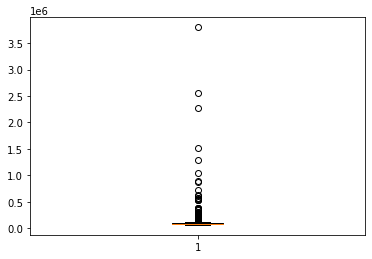

In [23]:
plt.figure()
plt.boxplot(final['sum'])
plt.show()

끝